In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
df_comp = pd.DataFrame()
for root, _, files in os.walk(os.curdir):
    for file in files:
        if file.endswith('.csv') and file != 'compiled.csv' and root == '.':
            ID = file.split('.')[0]
            df = pd.read_csv(file).T.reset_index().T
            df = df.rename({'index':ID})
            df_comp = pd.concat([df_comp, df])
df_comp.columns = ['run 1', 'run 2', 'run 3', 'run 4']
print(df_comp)

         run 1   run 2   run 3   run 4
aliza1  22.862   45.35  66.984  21.888
aliza2   29.53   8.616   7.056   3.841
aliza3  12.431   6.069   8.015   8.643
aliza4   3.161   5.736  10.417   6.815
bent1     7.05   5.916   6.032   9.632
...        ...     ...     ...     ...
seal4    9.621   6.858   8.402   5.298
stan1   26.569  22.861  60.383  12.551
stan2   16.619  11.471  22.008  10.871
stan3    9.883  11.658  10.698  12.672
stan4    7.656  15.993  14.512  12.804

[64 rows x 4 columns]


In [ ]:
df_comp.to_csv('compiled/compiled.csv')

In [5]:
df = pd.read_csv('compiled/compiled.csv')

In [3]:
df_comp['run 1'] = df_comp['run 1'].astype(float)
df_comp['run 2'] = df_comp['run 2'].astype(float)
df_comp['run 3'] = df_comp['run 3'].astype(float)
df_comp['run 4'] = df_comp['run 4'].astype(float)

In [4]:
df_comp['mean'] = df_comp.mean(axis=1)

In [5]:
df_comp = df_comp[['mean']]

In [6]:
new_df = {}
for tester, data in df_comp.iterrows():
    if tester[:-1] not in new_df:
        new_df[tester[:-1]] = [0,0,0,0]
    new_df[tester[:-1]][int(tester[-1])-1] = data['mean']

In [7]:
new_df

{'aliza': [39.271, 12.26075, 8.7895, 6.53225],
 'bent': [7.157500000000001, 9.641, 10.48675, 8.303249999999998],
 'bon': [18.03875, 17.18325, 8.74075, 8.02575],
 'cam': [11.315750000000001, 15.414250000000001, 8.79125, 8.626],
 'enzo': [11.070249999999998, 6.3927499999999995, 6.874, 7.497249999999999],
 'gabby': [6.8785, 7.9345, 4.422, 8.983],
 'hanz': [7.1905, 5.9175, 5.4885, 5.2524999999999995],
 'jc': [27.433499999999995, 11.65025, 8.108, 11.63975],
 'jean': [69.05575, 22.425, 38.44225, 23.555000000000003],
 'jer': [5.513000000000001, 5.51675, 6.6375, 4.754],
 'lanz': [18.48775, 13.3875, 11.888, 22.425],
 'mart': [10.899999999999999, 6.754, 6.013, 11.05025],
 'orrin': [8.15275, 6.462249999999999, 5.2627500000000005, 4.85],
 'rob': [9.879999999999999, 18.088, 7.2875000000000005, 6.16275],
 'seal': [15.347666666666667,
  17.736333333333334,
  9.042250000000001,
  7.5447500000000005],
 'stan': [30.591, 15.24225, 11.22775, 12.74125]}

In [8]:
new_df = pd.DataFrame(new_df).T

In [9]:
new_df.columns = ['trial 1', 'trial 2', 'trial 3', 'trial 4']

In [10]:
new_df

,trial 1,trial 2,trial 3,trial 4
aliza,39.271000,12.260750,8.78950,6.53225
bent,7.157500,9.641000,10.48675,8.30325
bon,18.038750,17.183250,8.74075,8.02575
cam,11.315750,15.414250,8.79125,8.62600
enzo,11.070250,6.392750,6.87400,7.49725
gabby,6.878500,7.934500,4.42200,8.98300
hanz,7.190500,5.917500,5.48850,5.25250
jc,27.433500,11.650250,8.10800,11.63975
jean,69.055750,22.425000,38.44225,23.55500
jer,5.513000,5.516750,6.63750,4.75400


In [11]:
day1 = new_df.loc[['aliza', 'bent', 'bon', 'gabby','stan','cam', 'jean', 'seal']]
day2 = new_df.loc[['enzo',  'hanz', 'jc',  'jer',  'lanz','mart','orrin','rob']]

In [12]:
day1.to_excel('day1.xlsx')

In [13]:
day2.to_excel('day2.xlsx')

In [14]:
def boxplot_per_run(df, y_low, y_upper, title):
    df[['trial 1', 'trial 2', 'trial 3', 'trial 4']].boxplot()
    plt.title(title)
    plt.ylim((y_low, y_upper))
    plt.xlabel('Trials')
    plt.ylabel('Time (s)')
    plt.show()

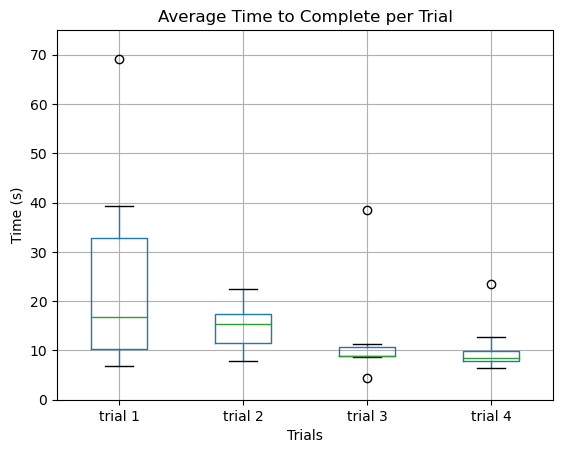

In [15]:
boxplot_per_run(day1, 0, 75, 'Average Time to Complete per Trial')

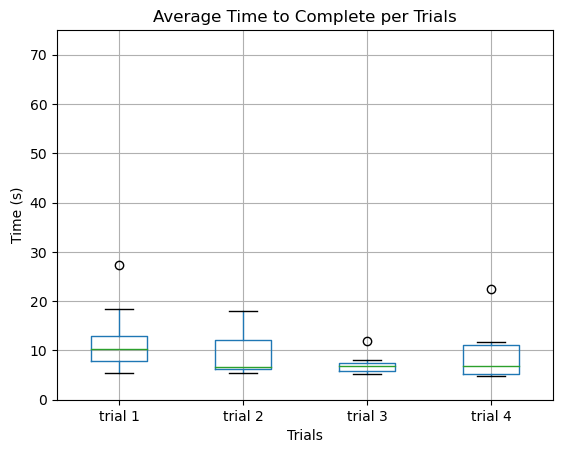

In [16]:
boxplot_per_run(day2, 0, 75, 'Average Time to Complete per Trials')

In [17]:
def lineplot_per_run(df, y_low, y_upper, title):
    df = df.reset_index().drop('index', axis=1)
    df = df.reset_index()
    df['index'] += 1
    new_index = ['tester ' + str(each) for each in list(df['index'])]
    df.index = new_index
    df.drop('index', axis=1, inplace=True)
    df.T.plot()
    plt.title(title)
    plt.ylim((y_low, y_upper))
    plt.xlabel('Trials')
    plt.ylabel('Time (s)')
    plt.grid(True)
    plt.xticks([0,1,2,3])
    plt.show()

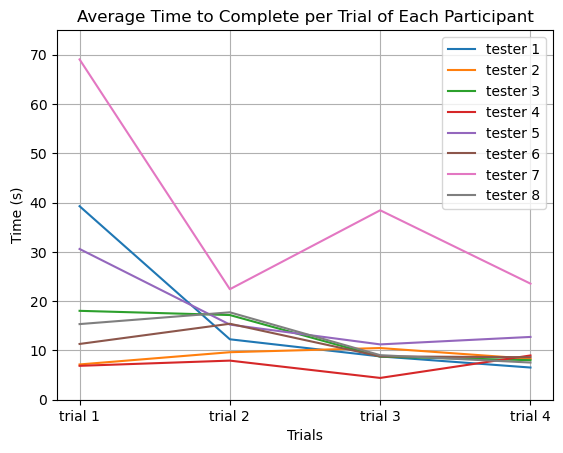

In [18]:
lineplot_per_run(day1, 0, 75, 'Average Time to Complete per Trial of Each Participant')

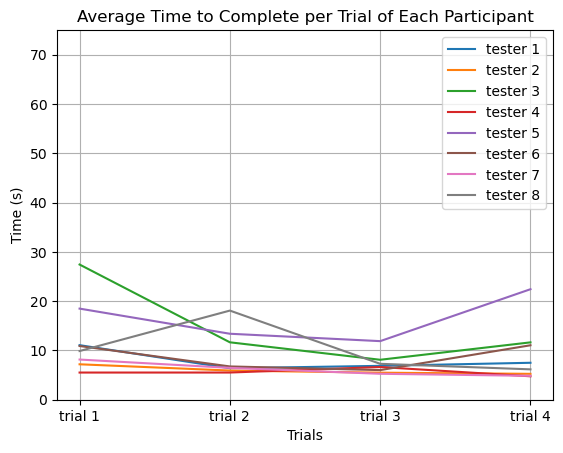

In [19]:
lineplot_per_run(day2, 0, 75, 'Average Time to Complete per Trial of Each Participant')